# CelebA GAN 1.01

Changes:
  - Longer run of run CelebA GAN 1.0


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.32G/1.33G [00:16<00:00, 76.9MB/s]
100% 1.33G/1.33G [00:16<00:00, 86.4MB/s]


In [3]:
!unzip celeba-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [4]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import fashion_mnist

import pickle

import CelebA

In [5]:
reload(CelebA)
reload(gan)

<module 'gan' from '/content/gan.py'>

In [14]:
BATCH_SIZE = 64
real_gen = CelebA.gen_real_img_batch("img_align_celeba",
                                     batch_size=BATCH_SIZE,
                                     positive_label=0.9)

In [7]:
reload(gan)
reload(CelebA)

<module 'CelebA' from '/content/CelebA.py'>

In [12]:
clear_session()
model = gan.GAN(x_shape=(32, 32, 3), kernal_size=5, verbose=True, lr=(1e-4, 2e-4),
                min_filters_gen=128, min_filters_discr=64,
                num_blocks=3)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16384)             1654784   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16384)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 512)         13107200  
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 512)         20

In [9]:
from glob import glob
total_real = len(glob("img_align_celeba/img_align_celeba/*.jpg"))
total_real

202599

In [10]:
reload(CelebA)

<module 'CelebA' from '/content/CelebA.py'>

Found 202599 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


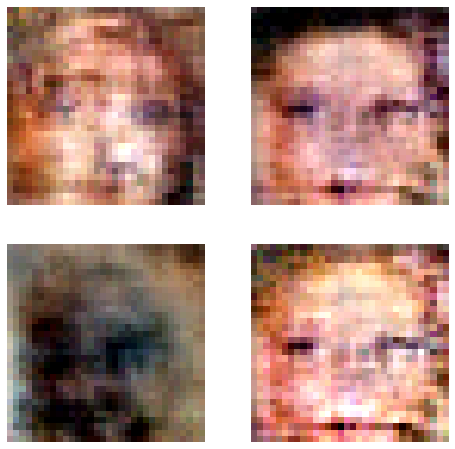

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


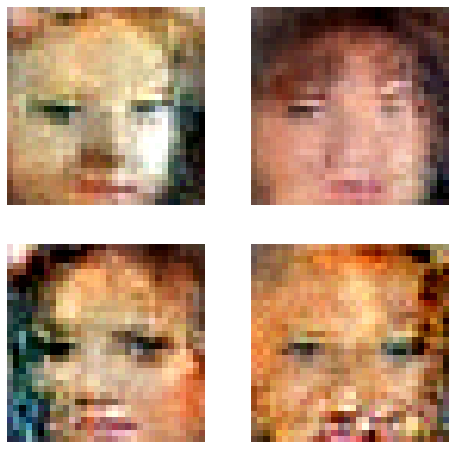

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


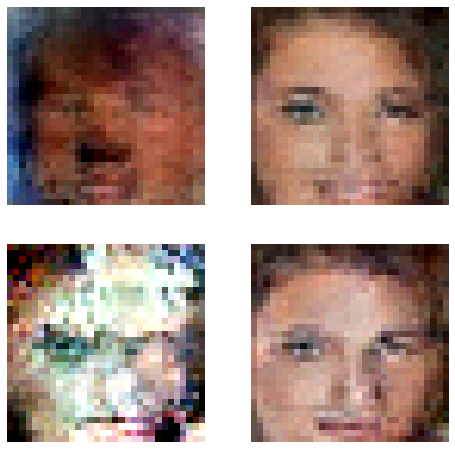

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


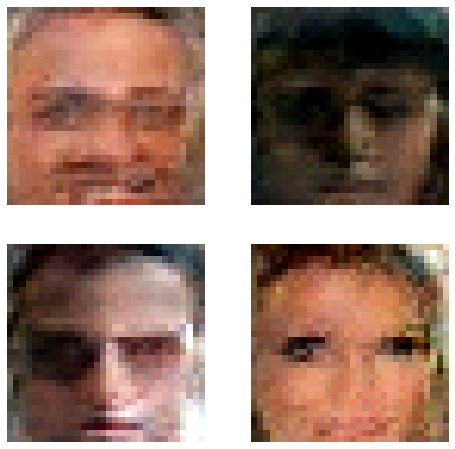

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


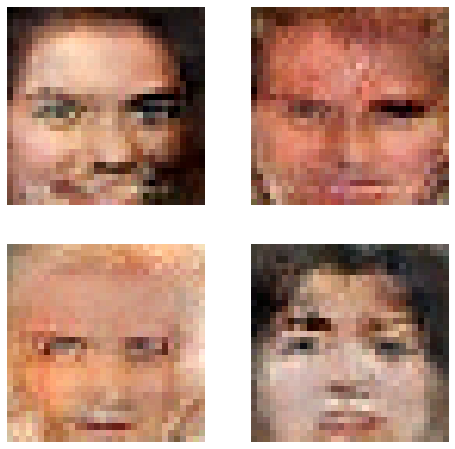

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


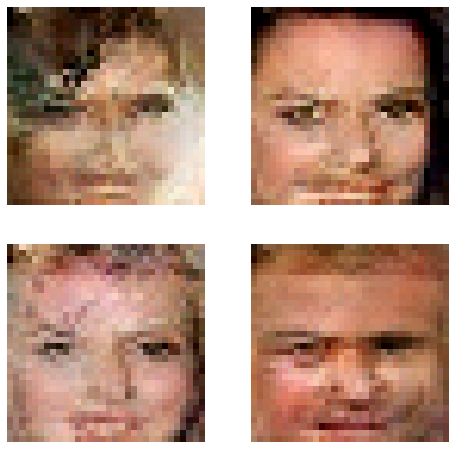

Buffered data was truncated after reaching the output size limit.

In [15]:
model.train(real_gen, num_epochs=20, batch_size=BATCH_SIZE, labels=(0, 0.9),
            total_real=total_real,
            progress_frac=1,
            postproc_func=CelebA.postproc_imgs)

In [16]:
model.save("celebA_gan_1_01", model_dir="celebA_model_1_01")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: celebA_model_1_01/combined/assets
INFO:tensorflow:Assets written to: celebA_model_1_01/generator/assets
INFO:tensorflow:Assets written to: celebA_model_1_01/discriminator/assets


In [24]:
!zip -r /content/model.zip /content/celebA_model_1_01
files.download("/content/model.zip")

updating: content/celebA_model_1_01/ (stored 0%)
updating: content/celebA_model_1_01/discriminator/ (stored 0%)
updating: content/celebA_model_1_01/discriminator/saved_model.pb (deflated 89%)
updating: content/celebA_model_1_01/discriminator/assets/ (stored 0%)
updating: content/celebA_model_1_01/discriminator/variables/ (stored 0%)
updating: content/celebA_model_1_01/discriminator/variables/variables.index (deflated 65%)
updating: content/celebA_model_1_01/discriminator/variables/variables.data-00000-of-00001 (deflated 8%)
updating: content/celebA_model_1_01/combined/ (stored 0%)
updating: content/celebA_model_1_01/combined/saved_model.pb (deflated 90%)
updating: content/celebA_model_1_01/combined/assets/ (stored 0%)
updating: content/celebA_model_1_01/combined/variables/ (stored 0%)
updating: content/celebA_model_1_01/combined/variables/variables.index (deflated 73%)
updating: content/celebA_model_1_01/combined/variables/variables.data-00000-of-00001 (deflated 8%)
updating: content/c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
!zip -r /content/temp_file_run_1_01.zip /content/Training_Runs
files.download("/content/temp_file_run_1_01.zip")

  adding: content/Training_Runs/ (stored 0%)
  adding: content/Training_Runs/a810c25f-9f9b-41da-b151-011f44748fcd/ (stored 0%)
  adding: content/Training_Runs/a810c25f-9f9b-41da-b151-011f44748fcd/model_summary.txt (deflated 87%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/ (stored 0%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/img_epoch9_step3165.png (deflated 13%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/img_epoch10_step3165.png (deflated 14%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/img_epoch11_step3165.png (deflated 14%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/img_epoch2_step3165.png (deflated 14%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/img_epoch8_step3165.png (deflated 14%)
  adding: content/Training_Runs/be1e186b-fcd5-410d-a747-ad129f8f3335/img_epoch16_step3165.png (deflated 14%)
  adding: content/Training_Runs/be1e18

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


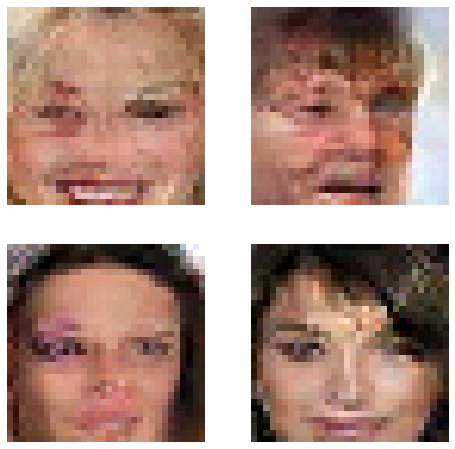

In [19]:
fig = model.generate_imgs(postproc_func=CelebA.postproc_imgs)

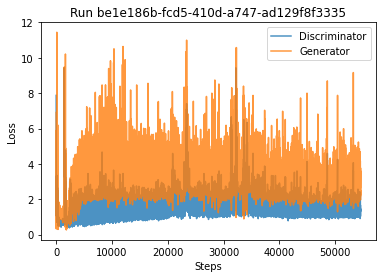

In [20]:
model.history.plot_loss()

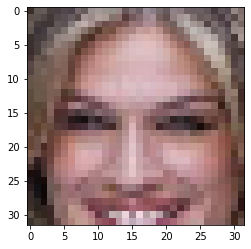

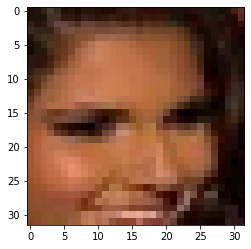

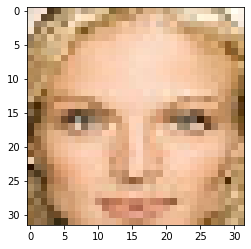

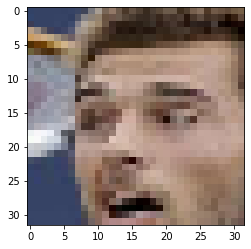

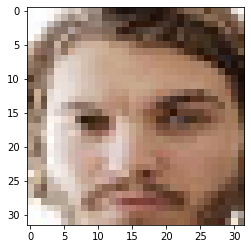

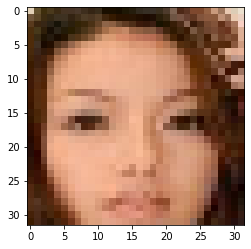

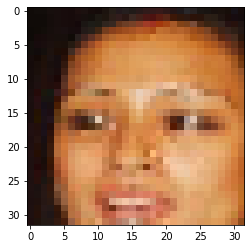

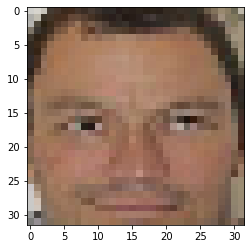

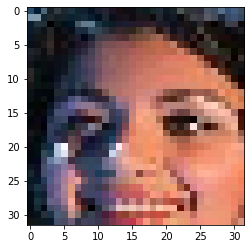

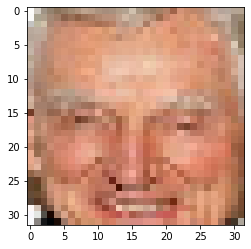

In [28]:
# Plot some 'real' images for reference
for i in range(10):
  plt.imshow(CelebA.postproc_imgs(next(real_gen)[0][i]))
  plt.show()